In [1]:
# pip install -r requirements.txt

In [1]:
import os
import argparse
from pydub import AudioSegment
import librosa
import soundfile as sf
from IPython.display import Audio, IFrame, display
import IPython.display as ipd
import matplotlib.pyplot as plt
from cmath import exp, pi
import numpy as np
import soundfile as sf
import numpy.fft as fft
from scipy.io import wavfile
from scipy import signal

In [2]:
path = ["Jason/", "Karina/", "Rifa/"]

file_path = []
for i in path:
    for(dirpath, dirnames, filenames) in os.walk(i):
        res = [i+x for x in filenames]
        file_path += res
file_path

['Jason/s4.wav',
 'Jason/s2.wav',
 'Jason/s3.wav',
 'Jason/s1.wav',
 'Karina/Sentence1.wav',
 'Karina/Sentence3.wav',
 'Karina/Sentence2.wav',
 'Karina/Sentence4.wav',
 'Rifa/Sentence 3.wav',
 'Rifa/Sentence 2.wav',
 'Rifa/Sentence 1.wav',
 'Rifa/Sentence 4.wav']

In [4]:
formats_to_convert = ['.m4a']

for i in path:
    for (dirpath, dirnames, filenames) in os.walk(i):
        for filename in filenames:
            if filename.endswith(tuple(formats_to_convert)):

                filepath = dirpath + '/' + filename
                (path, file_extension) = os.path.splitext(filepath)
                file_extension_final = file_extension.replace('.', '')
                try:
                    track = AudioSegment.from_file(filepath,
                            file_extension_final)
                    wav_filename = filename.replace(file_extension_final, 'wav')
                    wav_path = dirpath + '/' + wav_filename
                    print('CONVERTING: ' + str(filepath))
                    file_handle = track.export(wav_path, format='wav')
                    os.remove(filepath)
                except:
                    print("ERROR CONVERTING " + str(filepath))

In [3]:
# function custom in use 
def lowest_power_of_2(x):
    i = 1;
    while i < x : i*=2;
    return i

In [4]:
# sample the input audio file to 500, 2000 and 16000Hz;
freq = [500, 2000, 16000]

# File in file_path from previous cells
for i in file_path:
    # reading the audio file using wavfile from scipy library
    sample_rate, audio_data = wavfile.read(i)

    # Initial Audio Processing
    x = len(audio_data.shape)
    if(x > 1) :
        audio_data = audio_data[:,0]
    audio = np.asarray(audio_data)
    N = len(audio)
    lp2 = lowest_power_of_2(N)
    audio = np.pad(audio, (0,lp2 - N), 'constant')
    dur = len(audio)/float(sample_rate)

    # frequency change
    for f in freq : 
        nsample = int( dur * f)
        a_freq = np.interp(np.linspace(0, len(audio), nsample, endpoint = False), np.arange(len(audio)), audio)
        wavfile.write("Audiorecording/" + str(f) + "_" + i.split("/")[0] + "_" + i.split("/")[1], f, a_freq.astype(np.int16))

In [5]:
# updating file_path to the newest sampled files
file_path = []
folder_path = "Audiorecording/"
for (dirpath ,dirnames, filenames) in os.walk(folder_path):
    file_path = [folder_path + x for x in filenames]
file_path

['Audiorecording/500_Rifa_Sentence 4.wav',
 'Audiorecording/16000_Karina_Sentence4.wav',
 'Audiorecording/2000_Jason_s4.wav',
 'Audiorecording/500_Jason_s4.wav',
 'Audiorecording/500_Jason_s3.wav',
 'Audiorecording/16000_Karina_Sentence3.wav',
 'Audiorecording/2000_Jason_s3.wav',
 'Audiorecording/.DS_Store',
 'Audiorecording/500_Rifa_Sentence 3.wav',
 'Audiorecording/500_Rifa_Sentence 2.wav',
 'Audiorecording/2000_Jason_s2.wav',
 'Audiorecording/16000_Karina_Sentence2.wav',
 'Audiorecording/500_Jason_s2.wav',
 'Audiorecording/500_Rifa_Sentence 1.wav',
 'Audiorecording/2000_Jason_s1.wav',
 'Audiorecording/16000_Karina_Sentence1.wav',
 'Audiorecording/500_Jason_s1.wav',
 'Audiorecording/16000_Rifa_Sentence 2.wav',
 'Audiorecording/16000_Rifa_Sentence 3.wav',
 'Audiorecording/16000_Rifa_Sentence 1.wav',
 'Audiorecording/2000_Rifa_Sentence 4.wav',
 'Audiorecording/16000_Rifa_Sentence 4.wav',
 'Audiorecording/2000_Rifa_Sentence 1.wav',
 'Audiorecording/2000_Rifa_Sentence 3.wav',
 'Audioreco

In [6]:
def dft(x):
    N = len(x)
    if N <= 1: 
        return x
    if N%2 !=0:
        x = np.append(x,np.zeros(1))
        N+=1
    
    even = dft(x[0::2])
    odd =  dft(x[1::2])
    T= [exp(-2j*pi*k/N)*odd[k] for k in range(N//2)]
    return [even[k] + T[k] for k in range(N//2)] + \
           [even[k] - T[k] for k in range(N//2)]

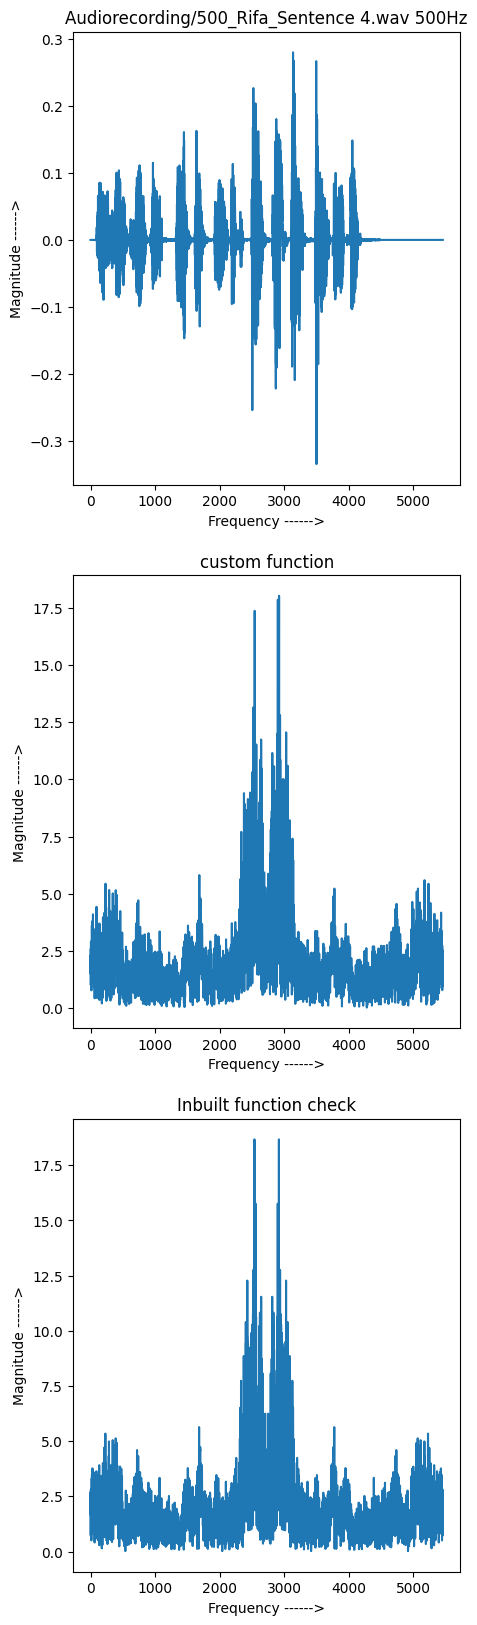

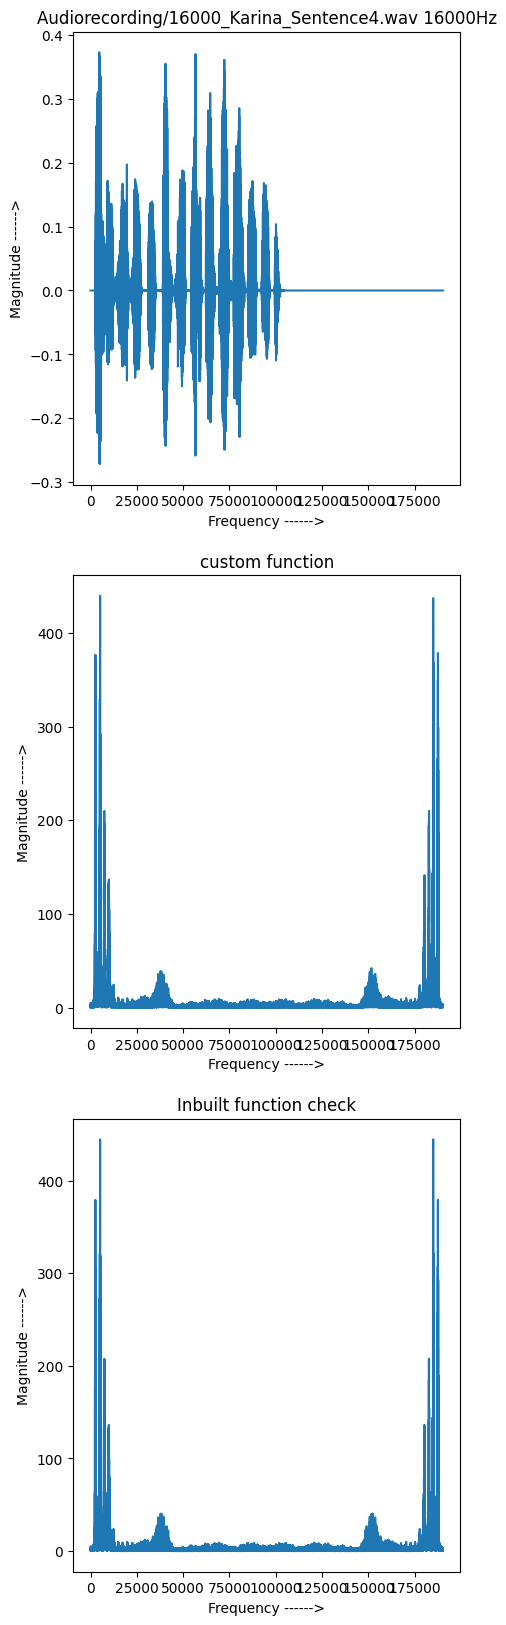

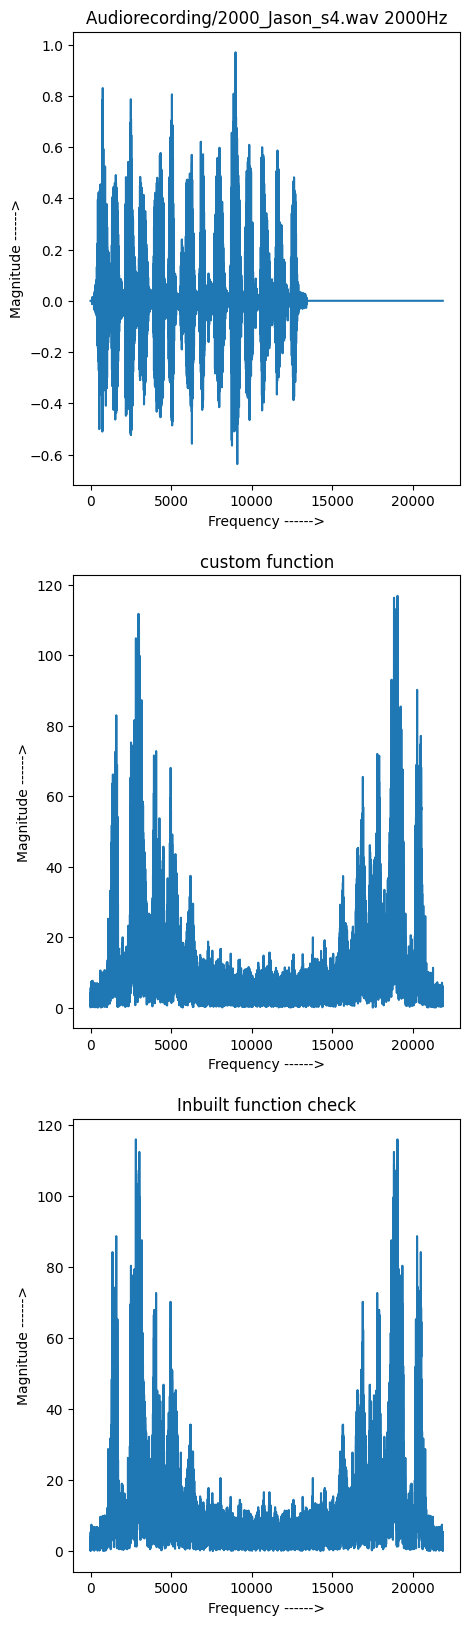

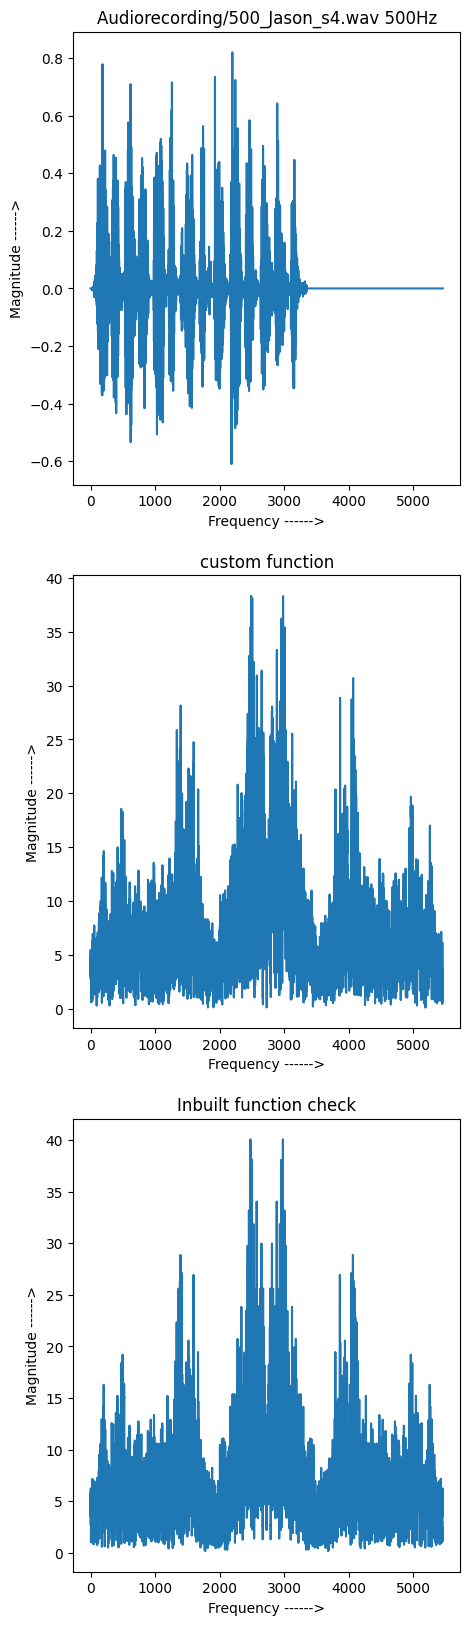

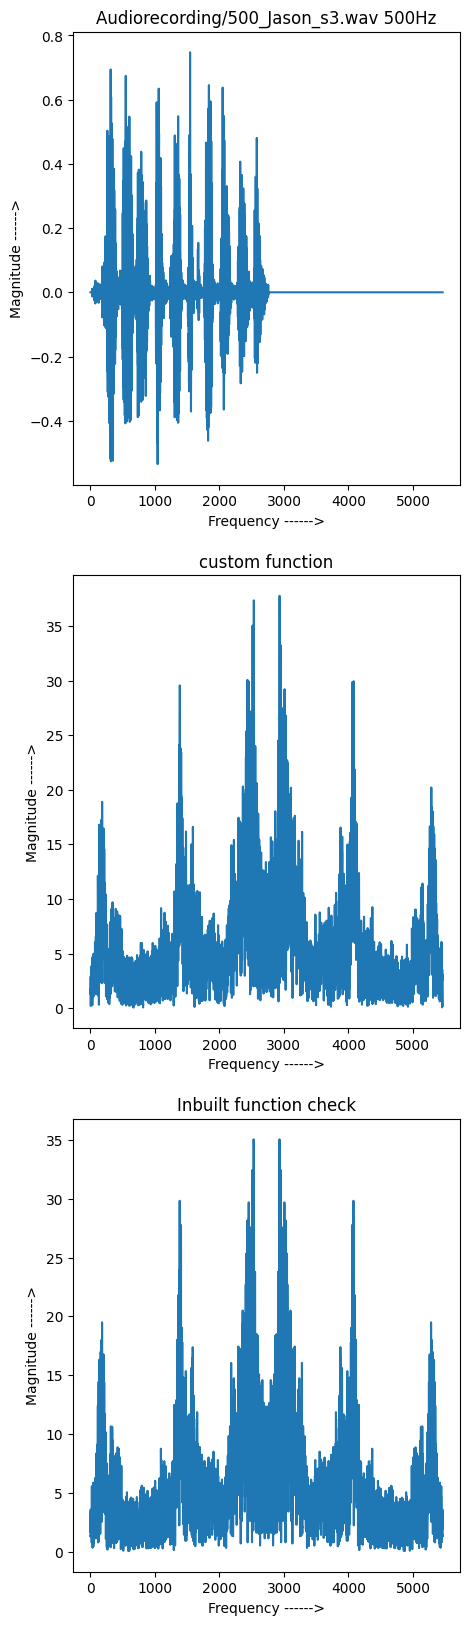

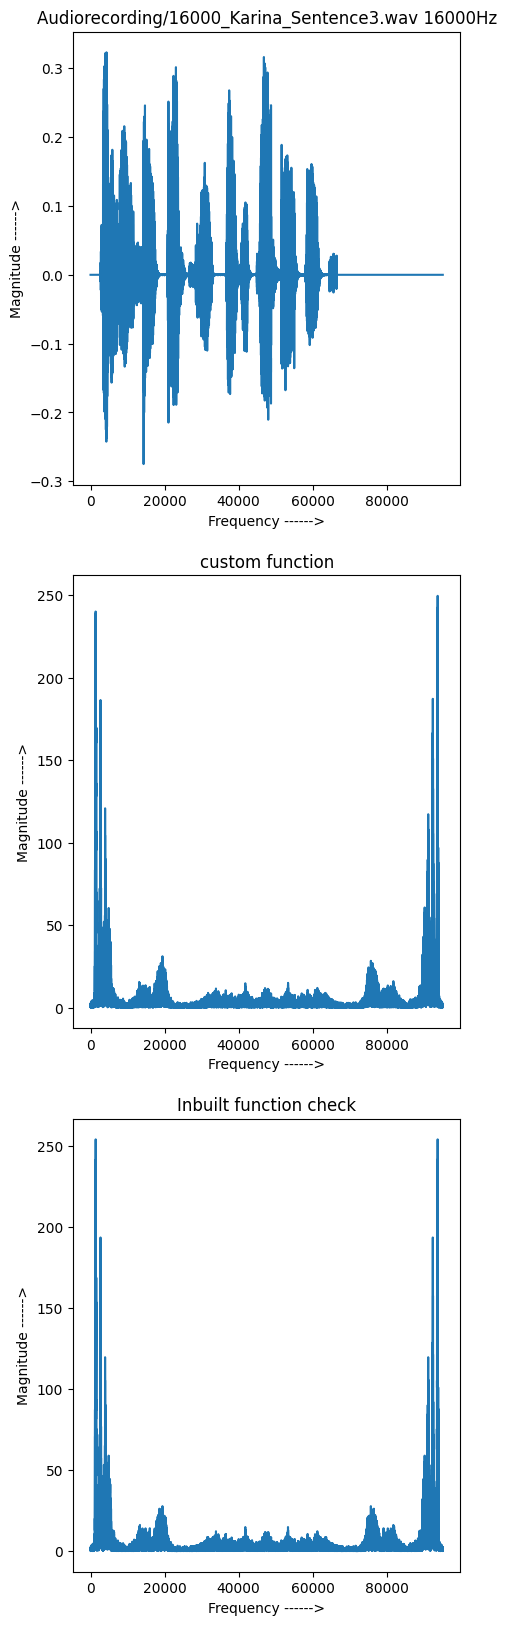

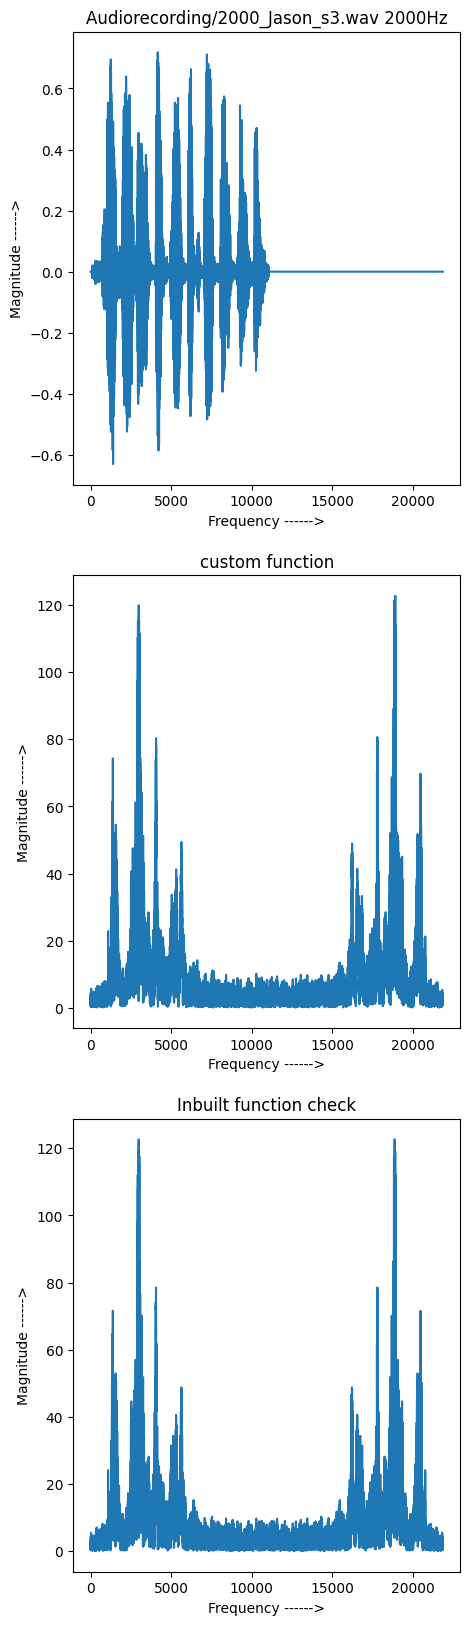

/var/folders/l_/kj1sdcvx2tdf7z3bwh8wt41r0000gn/T/ipykernel_84537/2539821567.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  samples, sampling_rate = librosa.load(i,sr=None,mono=True, offset = 0.0, duration = None)
/opt/homebrew/Caskroom/miniconda/base/envs/sns/lib/python3.9/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


NoBackendError: 

In [7]:
for i in file_path:
    samples, sampling_rate = librosa.load(i,sr=None,mono=True, offset = 0.0, duration = None)
    duration = len(samples)/sampling_rate
    # print(duration)
    plt.figure(figsize = (5,20))
    plt.subplot(3,1,1)
    
    plt.title(i + " " + str(sampling_rate) + "Hz")
    # librosa.display.waveshow(y = samples, sr = sampling_rate)
    plt.plot(samples)
    plt.xlabel("Frequency ------>")
    plt.ylabel("Magnitude ------>")
    # plt.show()
    
    plt.subplot(3,1,2)
    x = np.abs(dft(samples))
    # librosa.display.waveshow(y=x, sr = sampling_rate)
    plt.plot(x)
    plt.title("custom function")
    plt.xlabel("Frequency ------>")
    plt.ylabel("Magnitude ------>")
    # plt.show()
    
    plt.subplot(3,1,3)
    z = abs(fft.fft(samples))
    plt.title("Inbuilt function check")
    # librosa.display.waveshow(y = z, sr = sampling_rate)
    plt.plot(z)
    plt.xlabel("Frequency ------>")
    plt.ylabel("Magnitude ------>")
    
    
    plt.show()

# Denoising

In [8]:
fc = 500
b = 100
N = int(np.ceil((4/b)))
if not N%2 : N+=1
n = np.arange(N)

h = np.sinc(2 * fc * (n - (N-1)/2))
w = np.blackman(N)
h = h * w
h = h/np.sum(h)

In [15]:
count = 0
for i in file_path :
    count = count + 1
    # samples, sampling_rate = librosa.load(i, sr = None, mono = True, offset = 0.0, duration = None )
    
    sampling_rate, samples = wavfile.read(i)
    
    display(Audio(data = samples, rate = sampling_rate))
    
#     samples = samples*1000
#     plt.figure(figsize = (10,10))
    
#     plt.title(i + " " + str(sampling_rate) + "Hz")
#     # librosa.display.waveshow(y = samples, sr = sampling_rate)
#     plt.plot(samples, label="original")
    
#     fsamples = signal.convolve(samples, h, mode = 'same') 
#     plt.plot(fsamples, label="denoised")
#     plt.legend()
#     plt.show()
#     # sf.write("Denoised/Filtered_" + i.split("/")[1], fsamples, sampling_rate)
#     if count == 3 : break

ValueError: File format b'\x00\x00\x00\x01' not understood. Only 'RIFF' and 'RIFX' supported.